1. Import Libraries

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


tensorflow: A deep learning library that provides tools for building and training neural networks.

layers, models, callbacks: Modules from tensorflow.keras to create layers, models, and define callbacks for training.

ImageDataGenerator: A Keras class used for augmenting image data in real-time during training.

numpy: A library for numerical operations, particularly useful for handling arrays.

matplotlib.pyplot: A plotting library for visualizing data.

seaborn: A data visualization library based on Matplotlib that provides a high-level interface for drawing attractive statistical graphics.

confusion_matrix: A function from sklearn.metrics to compute a confusion matrix, which is a summary of prediction results.

2. Load the MNIST Dataset


In [4]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


This code loads the MNIST dataset, which consists of 70,000 handwritten digit images (0-9), each of size 28x28 pixels.

The dataset is split into training data (x_train, y_train) and testing data (x_test, y_test).

3. Normalize the Data


In [6]:
# Normalize the data to range [0, 1]
x_train,x_test=x_train/255.0,x_test/255.0

Normalization scales the pixel values from [0, 255] to [0, 1], which helps improve model training efficiency and convergence speed.

4. Add Channel Dimension


In [7]:
# Add a channel dimension to the images (28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)  # Shape becomes (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1)    # Shape becomes (10000, 28, 28, 1)


The original MNIST images are 3D arrays of shape (60000, 28, 28) for training and (10000, 28, 28) for testing.

The code adds a channel dimension, changing the shape to (60000, 28, 28, 1) for training and (10000, 28, 28, 1) for testing. The additional dimension represents the color channel (grayscale in this case).

5. Create Data Augmentation


In [8]:
# Create an ImageDataGenerator for data augmentation
data_augmentation=ImageDataGenerator(
    rotation_range=10,  # Rotate images randomly in the range (0-10 degrees)
    zoom_range=0.1      # Randomly zoom into images
)

ImageDataGenerator allows you to apply real-time data augmentation, which helps in making the model more robust and prevents overfitting.

Here, images will be randomly rotated by up to 10 degrees and zoomed in by up to 10%.

6. Create the Neural Network Model


In [9]:
# Create the neural network model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),       # Specify input shape with channels
    layers.Flatten(),                       # Flatten 28x28x1 images into a 1D vector
    layers.Dense(256, activation='relu'),  # First dense layer with 256 neurons
    layers.Dropout(0.3),                   # Dropout layer to prevent overfitting
    layers.Dense(128, activation='relu'),  # Second dense layer with 128 neurons
    layers.Dense(64, activation='relu'),   # Third dense layer with 64 neurons
    layers.Dense(10, activation='softmax') # Output layer with 10 classes (digits 0-9)
])


This section defines a Sequential model, which is a linear stack of layers.

Input(shape=(28, 28, 1)): Defines the input shape of the images.

Flatten(): Converts each 2D image (28x28) into a 1D array (784).

Dense(256, activation='relu'): Adds a dense layer with 256 neurons and ReLU activation.

Dropout(0.3): Adds a dropout layer to randomly set 30% of the neurons to zero during training, which helps prevent overfitting.

Dense(128) and Dense(64): Two more dense layers with 128 and 64 neurons respectively.

Dense(10, activation='softmax'): Output layer with 10 neurons for each digit (0-9) and uses softmax to output probabilities.

7. Early Stopping Callback


In [10]:
# Early stopping to prevent overfitting if validation loss stops improving
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3)


The EarlyStopping callback monitors the validation loss during training and stops training if it does not improve for 3 consecutive epochs, helping to prevent overfitting.

8. Compile the Model


In [11]:
# Compile the model
model.compile(optimizer='adam',               
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])           


The model is compiled with:

optimizer='adam': Adam optimizer, which adapts the learning rate during training.

loss='sparse_categorical_crossentropy': Loss function suitable for multi-class classification problems.

metrics=['accuracy']: To track the accuracy of the model during training and evaluation.

9. Train the Model


In [12]:
# Train the model with data augmentation and early stopping
history = model.fit(data_augmentation.flow(x_train, y_train, batch_size=32), 
                    epochs=20, 
                    validation_data=(x_test, y_test), 
                    callbacks=[early_stopping])


Epoch 1/20
   9/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.1698 - loss: 2.2749   

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8480 - loss: 0.4836 - val_accuracy: 0.9613 - val_loss: 0.1203
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9458 - loss: 0.1737 - val_accuracy: 0.9686 - val_loss: 0.1040
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9581 - loss: 0.1385 - val_accuracy: 0.9773 - val_loss: 0.0746
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9620 - loss: 0.1221 - val_accuracy: 0.9774 - val_loss: 0.0674
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9653 - loss: 0.1079 - val_accuracy: 0.9800 - val_loss: 0.0648
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9687 - loss: 0.1013 - val_accuracy: 0.9787 - val_loss: 0.0691
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9701 - loss: 0.0961 - val_accuracy: 0.9816 - val_loss: 0.0585
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9725 - loss: 0.0869 - val_accura

The model is trained using the augmented data generator.

data_augmentation.flow(x_train, y_train, batch_size=32): Generates batches of augmented images and labels.

epochs=20: The model will be trained for 20 epochs.

validation_data=(x_test, y_test): Evaluates the model on the test set after each epoch.

callbacks=[early_stopping]: Uses the early stopping callback defined earlier.


10. Evaluate the Model


In [13]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.9794 - loss: 0.0672
Test accuracy: 0.9835000038146973


The model’s performance is evaluated on the test dataset, and the accuracy is printed.


11. Plot Accuracy and Loss


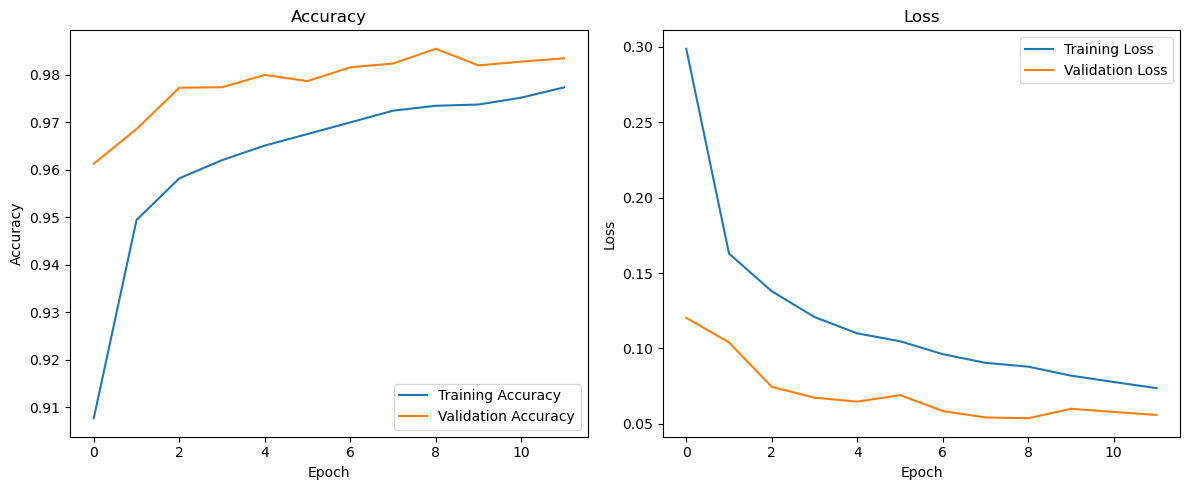

In [14]:
# Function to plot accuracy and loss
def plot_accuracy_loss(history):
    plt.figure(figsize=(12, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the accuracy and loss
plot_accuracy_loss(history)


A function plot_accuracy_loss is defined to visualize the training and validation accuracy and loss over the epochs.

Two subplots are created: one for accuracy and one for loss, each showing training and validation metrics over epochs.

12. Make a Prediction


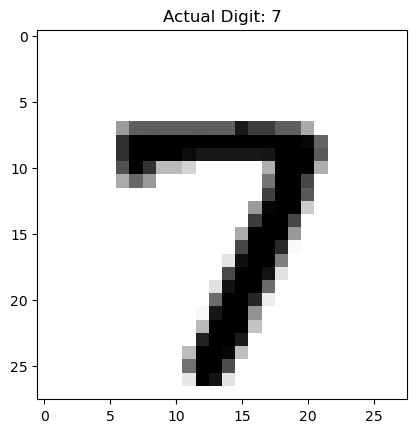

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted digit: 7


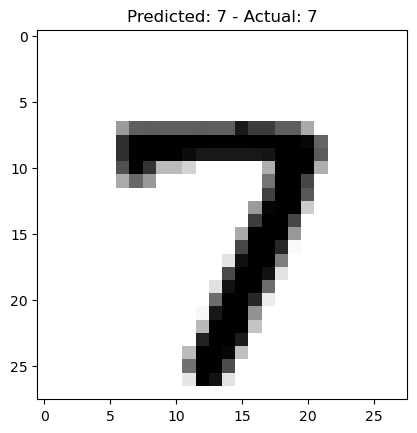

In [15]:
# Randomly select a test image and make a prediction
index = np.random.randint(0, len(x_test))
plt.imshow(x_test[index].reshape(28, 28), cmap=plt.cm.binary)  # Reshape for visualization
plt.title(f"Actual Digit: {y_test[index]}")
plt.show()

# Make a prediction
prediction = model.predict(np.expand_dims(x_test[index], axis=0))  # Expand dims for prediction
predicted_label = np.argmax(prediction)
print(f"Predicted digit: {predicted_label}")

# Visualize the predicted and actual digit
plt.imshow(x_test[index].reshape(28, 28), cmap=plt.cm.binary)  # Reshape for visualization
plt.title(f"Predicted: {predicted_label} - Actual: {y_test[index]}")
plt.show()


A random test image is selected and displayed along with its actual label.

The model predicts the label for the selected image.

The prediction is visualized with the predicted








